In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [3]:
path = untar_data(URLs.PETS); path

WindowsPath('C:/Users/Mikhail/.fastai/data/oxford-iiit-pet')

In [4]:
path_anno = path/'annotations'
path_img = path/'images'

In [5]:
fnames = get_image_files(path_img)
fnames[:5]


[WindowsPath('C:/Users/Mikhail/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 WindowsPath('C:/Users/Mikhail/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),
 WindowsPath('C:/Users/Mikhail/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),
 WindowsPath('C:/Users/Mikhail/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),
 WindowsPath('C:/Users/Mikhail/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg')]

In [8]:
fnames[:]

[WindowsPath('C:/Users/Mikhail/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 WindowsPath('C:/Users/Mikhail/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),
 WindowsPath('C:/Users/Mikhail/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),
 WindowsPath('C:/Users/Mikhail/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),
 WindowsPath('C:/Users/Mikhail/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),
 WindowsPath('C:/Users/Mikhail/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),
 WindowsPath('C:/Users/Mikhail/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg'),
 WindowsPath('C:/Users/Mikhail/.fastai/data/oxford-iiit-pet/images/Abyssinian_105.jpg'),
 WindowsPath('C:/Users/Mikhail/.fastai/data/oxford-iiit-pet/images/Abyssinian_106.jpg'),
 WindowsPath('C:/Users/Mikhail/.fastai/data/oxford-iiit-pet/images/Abyssinian_107.jpg'),
 WindowsPath('C:/Users/Mikhail/.fastai/data/oxford-iiit-pet/images/Abyssinian_108.jpg'),
 WindowsPath('C:/Users/M

In [11]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'


NameError: name 'bs' is not defined

In [13]:
bs = 64

In [15]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

c:\users\mikhail\appdata\local\programs\python\python38\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
c:\users\mikhail\appdata\local\programs\python\python38\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample

c:\users\mikhail\appdata\local\programs\python\python38\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
c:\users\mikhail\appdata\local\programs\python\python38\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample

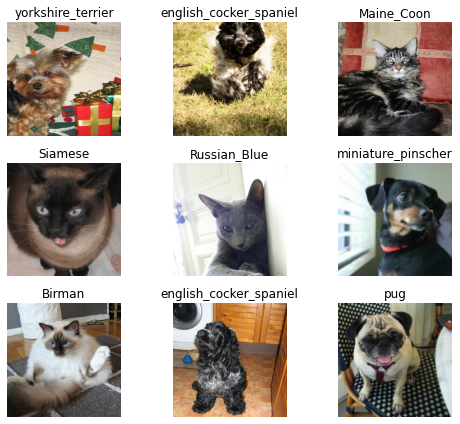

In [16]:
data.show_batch(rows=3, figsize=(7,6))

In [17]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

c:\users\mikhail\appdata\local\programs\python\python38\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
c:\users\mikhail\appdata\local\programs\python\python38\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample

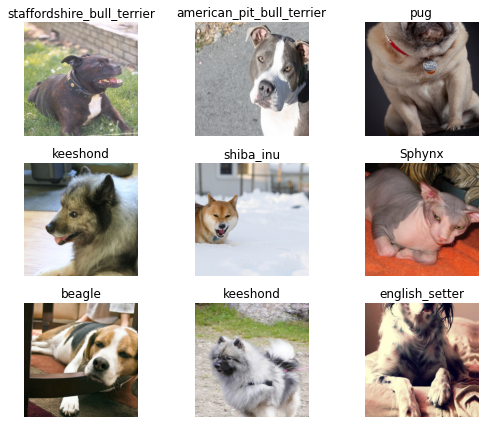

In [18]:
data.show_batch(rows=3, figsize=(7,6))

In [19]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [20]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\Mikhail/.cache\torch\checkpoints\resnet34-333f7ec4.pth
100.0%


In [21]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [22]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.400274,0.338693,0.112314,01:24
1,0.610318,0.279887,0.085250,01:17
2,0.377824,0.241260,0.077131,01:20
3,0.287711,0.236326,0.077131,01:19


In [23]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

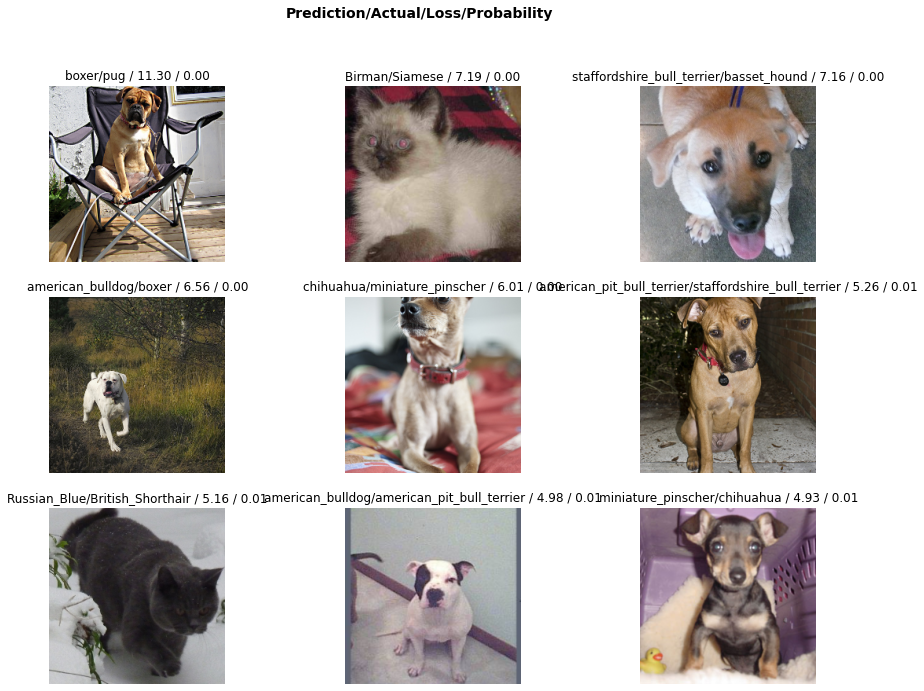

In [24]:
interp.plot_top_losses(9, figsize=(15,11))

In [25]:
doc(interp.plot_top_losses)

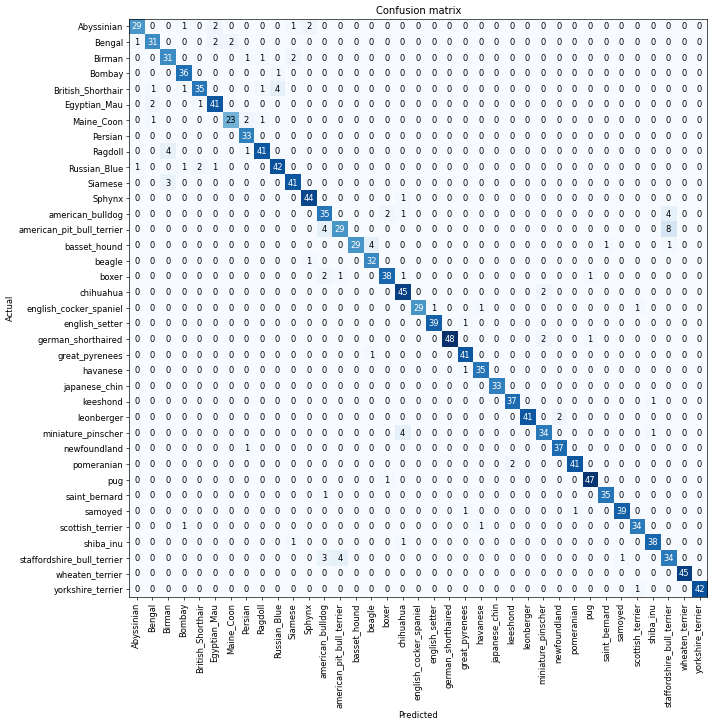

In [26]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [27]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Ragdoll', 'Birman', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('basset_hound', 'beagle', 4),
 ('miniature_pinscher', 'chihuahua', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Siamese', 'Birman', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Abyssinian', 'Egyptian_Mau', 2),
 ('Abyssinian', 'Sphynx', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Bengal', 'Maine_Coon', 2),
 ('Birman', 'Siamese', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Maine_Coon', 'Persian', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_bulldog', 'boxer', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('german_shorthaired', 'miniature_pinscher', 2),
 ('leonberger', 'newfoundland', 2),
 ('pomeranian', 'keeshond', 2)]

In [28]:
learn.unfreeze()

In [29]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.703041,0.372719,0.110284,01:25


In [30]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


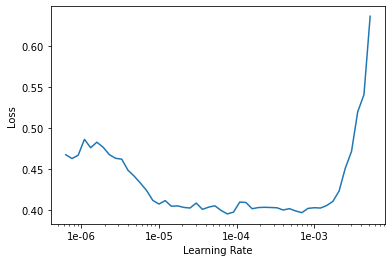

In [31]:
learn.recorder.plot()

In [35]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.154821,0.233266,0.073072,01:24
1,0.127462,0.225400,0.067659,01:25


In [38]:
doc(learn.fit_one_cycle)

In [39]:
np.random.seed(2)

In [40]:
2

2

In [41]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [42]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [43]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.392477,0.372316,0.125169,01:22
1,0.624088,0.271615,0.086604,01:20
2,0.377565,0.230375,0.075101,01:22
3,0.283509,0.228191,0.073748,01:22


In [44]:
learn.save('stage-1')

In [46]:
doc(learn.save)

In [47]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

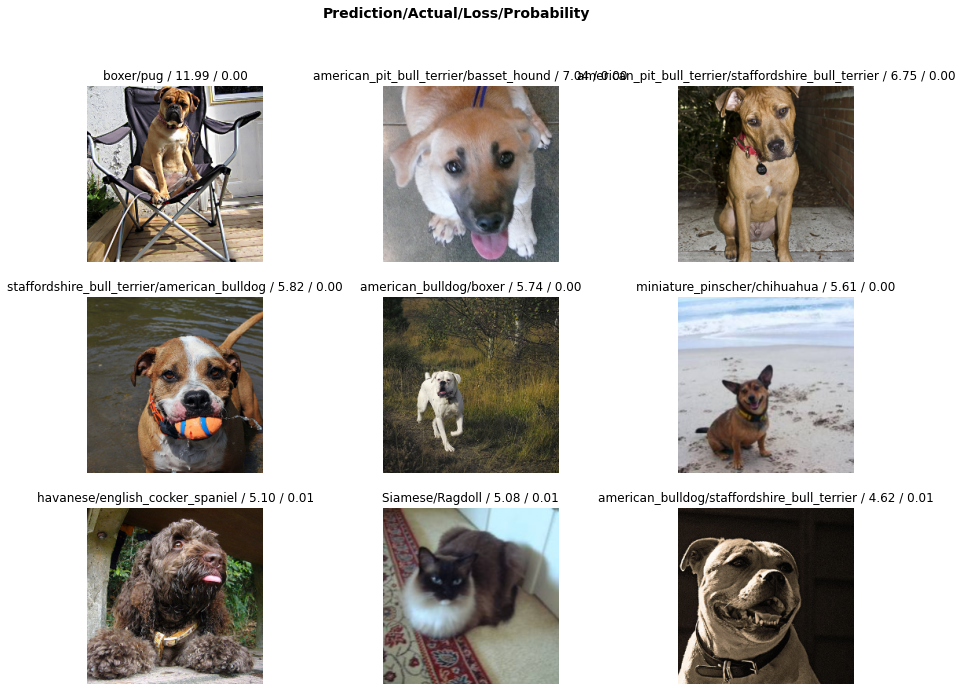

In [48]:
interp.plot_top_losses(9, figsize=(15,11))

In [49]:
doc(interp.plot_top_losses)

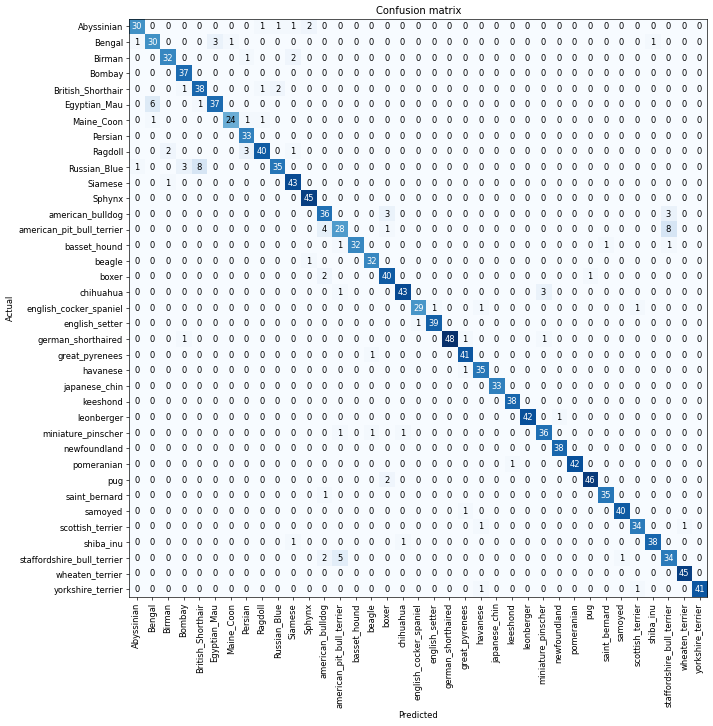

In [50]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [51]:
interp.most_confused(min_val=2)

[('Russian_Blue', 'British_Shorthair', 8),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('Egyptian_Mau', 'Bengal', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Ragdoll', 'Persian', 3),
 ('Russian_Blue', 'Bombay', 3),
 ('american_bulldog', 'boxer', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('Abyssinian', 'Sphynx', 2),
 ('Birman', 'Siamese', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Ragdoll', 'Birman', 2),
 ('boxer', 'american_bulldog', 2),
 ('pug', 'boxer', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

In [52]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [53]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\Mikhail/.cache\torch\checkpoints\resnet50-19c8e357.pth
100.0%


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


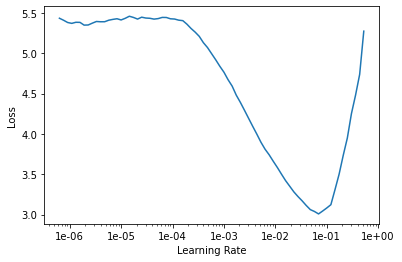

In [54]:
learn.lr_find()
learn.recorder.plot()

In [55]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.704770,0.280433,0.088633,02:05
1,0.481477,0.269364,0.093369,01:59
2,0.458958,0.267140,0.084574,02:01
3,0.319111,0.255965,0.066982,02:06
4,0.253018,0.206881,0.064953,02:09
5,0.183928,0.194175,0.058187,02:09
6,0.154870,0.184588,0.050744,03:46
7,0.109207,0.179183,0.050068,05:03


In [56]:
learn.save('stage-1-50')

In [61]:
help(np.random.seed())

Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.

